# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 5

### Wstęp

Przedsiębiorstwo zajmujące się produkcją wyrobów mlecznych otrzymało kilka zamówień od klientów. Dane dotyczące cen składników, ich wykorzystania w produktach oraz zamówień zostały przedstawione poniżej.

### Dane

**Ceny składników:**

| Składnik     | Cena (PLN) |
| :---         | ---: |
| Mleko (l)    | 3.5 |
| Cukier (kg)  | 5   |
| Kakao (100g) | 8   |
| Sól (kg)     | 2   |


**Zestawienie składników wykorzystywanych w produktach:**

| Prod.\Skł.| Mleko (l) | Cukier (kg)  | Kakao (100g) | Sól (kg)    |
| :---      |      ---: |         ---: |         ---: |        ---: |
| Masło     | 5         | 0            | 0            | 0           |
| Czekolada | 1         | 0.1          | 5            | 0.01        |
| Ser żółty | 10        | 0            | 0            | 0.05        |
| Twaróg    | 2         | 0            | 0            | 0.1         |


**Zamówienia złożone przez klientów:**

| Klient\Prod.| Masło | Czekolada | Ser żółty | Twaróg |
| :---        |  ---: |      ---: |      ---: |   ---: |
| Klient 1    | 10    | 50        | 5         | 5      |
| Klient 2    | 120   | 90        | 15        | 25     |
| Klient 3    | 0     | 10        | 1         | 1      |


> **Uwaga**: W celu wizualizacji wyników można wykorzystać funkcję `plt.table`.

> Informacja: Przedstawione dane mają charakter poglądowy i nie odwzorowują rzeczywistych uwarunkowań rynkowych.

### Zadanie 1

Z wykorzystaniem operacji macierzowych należy obliczyć odpowiednie wartości i udzielić odpowiedzi na poniższe pytania:

#### A) Jaki jest koszt wyprodukowania każdego z produktów?






 

In [39]:
#Tabele
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Ceny składników
df_ceny_skladnikow = pd.DataFrame({
    'Skladnik': ['Mleko', 'Cukier', 'Kakao', 'Sol'],
    'Cena':      [3.5, 5, 8, 2]
})

#Produkcja
df_produkcja = pd.DataFrame({
    'Prod-Skl':  ['Maslo', 'Czekolada', 'Ser_zolty', 'Twarog'],
    'Mleko':     [5, 1, 10, 2],
    'Cukier':    [0, 0.1, 0, 0],
    'Kakao':     [0, 5, 0, 0],
    'Sol':       [0, 0.01, 0.05, 0.1]
})

#Zamowienia 
df_zamowienia = pd.DataFrame({
    'Klient-produkt': ['Klient_1', 'Klient_2', 'Klient_3'],
    'Maslo':           [10, 120, 0],
    'Czekolada':       [50, 90, 10],
    'Ser_zolty':       [5, 15, 1],
    'Twarog':          [5, 25, 1] 
})

#Stworzenie array do operacji macierzowych
ceny_arr = np.array(df_ceny_skladnikow.drop(columns = ['Skladnik']))
produkcja_arr = np.array(df_produkcja.drop(columns = ['Prod-Skl']))
zamowienia_arr = np.array(df_zamowienia.drop(columns = ['Klient-produkt']))

#Koszt produkcji
koszt_arr = produkcja_arr @ ceny_arr
print("Koszt produkcji produktów:")

for i, p in enumerate(df_produkcja["Prod-Skl"]):
    print(f"{p}: {float(koszt_arr[i].item()):.2f} zl")



Koszt produkcji produktów:
Maslo: 17.50 zl
Czekolada: 44.02 zl
Ser_zolty: 35.10 zl
Twarog: 7.20 zl


#### B) Ile składników zostanie uzytych na realizację zamówień klientów (każdego osobno i łącznie)?



(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

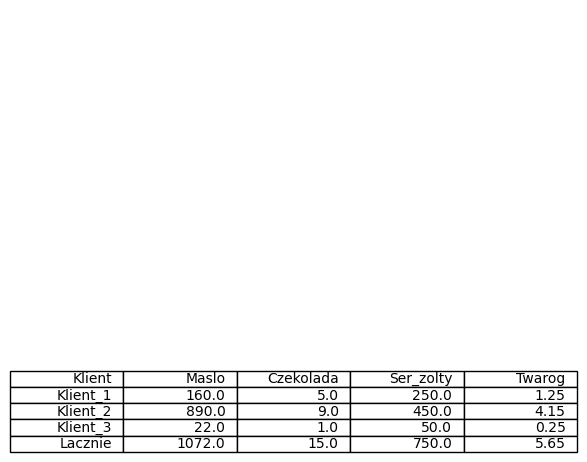

In [53]:
#Zuzycie array
zuzycie_arr = zamowienia_arr @ produkcja_arr 
zuzycie_arr = np.vstack((zuzycie_arr, zuzycie_arr.sum(axis = 0)))

#Table nazwa wierszy i kolumn
row_names = df_zamowienia["Klient-produkt"].tolist()
row_names.append("Lacznie")
col_names = df_produkcja["Prod-Skl"].tolist()

#Dodanie kolumny z nazwami wierszy
table = np.column_stack((row_names, zuzycie_arr))
#Dodanie naglowka z nazwami kolumn
header = np.insert(col_names, 0, "Klient")
table = np.vstack((header, table))

plt.table(table)
plt.axis("off")

#### C) Zakładając marżę $30\%$ (pomijając wszystkie inne czynniki), ile klienci będą musieli zapłacić za zrealizowanie zamówienia?



In [56]:
#Koszt
zuzycie_arr = zamowienia_arr @ produkcja_arr 
koszt_arr = zuzycie_arr @ ceny_arr
koszt_arr_marza = koszt_arr *1.3

Client_names = df_zamowienia["Klient-produkt"].tolist()

for i,k in enumerate(Client_names):
    print(f"{k} Do zaplaty: {koszt_arr_marza[i].item():.2f} zl")


Klient_1 Do zaplaty: 3363.75 zl
Klient_2 Do zaplaty: 8798.79 zl
Klient_3 Do zaplaty: 627.25 zl


#### D) Jaki jest łączny koszt składników jakie należy zamówić, aby zrealizować wszystkie zamówienia klientów?




In [57]:
total = np.sum(koszt_arr)
print(f"Do zaplaty: {total:.2f} zl")

Do zaplaty: 9838.30 zl


### Zadanie 2

Należy zaimplementować skrypt, który przyjmuje dwie macierze $A$ oraz $B$, a następnie wypisuje szczegółowe operacje wykonywane podczas ich mnożenia.

**Przykład:**

Dane wejściowe:

\begin{equation}
A = \begin{pmatrix}
1 & 2 & 1\\
4 & 4 & 5\\
6 & 7 & 7
\end{pmatrix}, 
 B = \begin{pmatrix}
-7 & -7 & 6\\
2 & 1 & -1\\
4 & 5 & -4
\end{pmatrix}
\end{equation}

Oczekiwany wynik:

```
C[0, 0] = 1 * (-7) + 2 * 2 + 1 * 4 = 1
C[0, 1] = 1 * (-7) + 2 * 1 + 1 * 5 = 0
C[0, 2] = 1 * 6 + 2 * (-1) + 1 * (-4) = 0
C[1, 0] = 4 * (-7) + 4 * 2 + 5 * 4 = 0
C[1, 1] = 4 * (-7) + 4 * 1 + 5 * 5 = 1
C[1, 2] = 4 * 6 + 4 * (-1) + 5 * (-4) = 0
C[2, 0] = 6 * (-7) + 7 * 2 + 7 * 4 = 0
C[2, 1] = 6 * (-7) + 7 * 1 + 7 * 5 = 0
C[2, 2] = 6 * 6 + 7 * (-1) + 7 * (-4) = 1

[[1 0 0]
 [0 1 0]
 [0 0 1]]
```



In [60]:
#############################################
a  =np.array([[1,2,1],
              [4,4,5],
              [6,7,7]
            ])
b  =np.array([[-7,-7,6],
              [2,1,-1],
              [4,5,-4]
            ])


###Function
def Matrix_mul(a,b):
    h_a, w_a = a.shape
    h_b, w_b = b.shape
    
    #Blad wymiarowosci
    if w_a != h_b:
        raise ValueError("NIe mozna wymnozyc macierzy - wymiary nie sa zgodne")
    
    
    c = np.zeros(shape = (h_a,w_b))
    
    h_c, w_c = c.shape
    
    for row in range(h_c):
        for column in range(w_c):
            
            #List for string values to display
            strings = []
            values = []
            for m in range(w_a):
                strings.append(f"{a[row, m]} * {b[m, column]}")
                values.append(a[row, m] * b[m, column])
            
            #Calciulate final value over stored values
            value = sum(values)
            
            #Join strings
            full_string = " + ".join(strings)
            full_string = full_string +" = "+str(value)

            
            #Print and set value
            c[row,column] = value
            print(f"C[{row}, {column}] = {full_string}")
            
    return c

c = Matrix_mul(a,b)
print("\n")
print(c)

C[0, 0] = 1 * -7 + 2 * 2 + 1 * 4 = 1
C[0, 1] = 1 * -7 + 2 * 1 + 1 * 5 = 0
C[0, 2] = 1 * 6 + 2 * -1 + 1 * -4 = 0
C[1, 0] = 4 * -7 + 4 * 2 + 5 * 4 = 0
C[1, 1] = 4 * -7 + 4 * 1 + 5 * 5 = 1
C[1, 2] = 4 * 6 + 4 * -1 + 5 * -4 = 0
C[2, 0] = 6 * -7 + 7 * 2 + 7 * 4 = 0
C[2, 1] = 6 * -7 + 7 * 1 + 7 * 5 = 0
C[2, 2] = 6 * 6 + 7 * -1 + 7 * -4 = 1


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
